# Ensemble Learning

## Initial Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Read the CSV and Perform Basic Data Cleaning

In [4]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [5]:
pre_df = pd.get_dummies(df, columns=["home_ownership"])
pre_df.head()

,loan_amnt,int_rate,installment,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,delinq_2yrs,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,10500.0,0.1719,375.35,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,0.0,...,65687.0,38199.0,2000.0,61987.0,N,N,0,0,0,1
1,25000.0,0.2000,929.09,105000.0,Verified,Mar-2019,low_risk,n,20.23,0.0,...,271427.0,60641.0,41200.0,49197.0,N,N,0,1,0,0
2,20000.0,0.2000,529.88,56000.0,Verified,Mar-2019,low_risk,n,24.26,0.0,...,60644.0,45684.0,7500.0,43144.0,N,N,0,1,0,0
3,10000.0,0.1640,353.55,92000.0,Verified,Mar-2019,low_risk,n,31.44,0.0,...,99506.0,68784.0,19700.0,76506.0,N,N,0,0,0,1
4,22000.0,0.1474,520.39,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,0.0,...,219750.0,25919.0,27600.0,20000.0,N,N,0,1,0,0


In [6]:
drop_f_df=pd.get_dummies(pre_df, columns=["pymnt_plan", "application_type", "hardship_flag", "debt_settlement_flag"], 
                         drop_first =True)
drop_f_df.head()

,loan_amnt,int_rate,installment,annual_inc,verification_status,issue_d,loan_status,dti,delinq_2yrs,inq_last_6mths,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,application_type_Joint App
0,10500.0,0.1719,375.35,66000.0,Source Verified,Mar-2019,low_risk,27.24,0.0,0.0,...,0.0,65687.0,38199.0,2000.0,61987.0,0,0,0,1,0
1,25000.0,0.2000,929.09,105000.0,Verified,Mar-2019,low_risk,20.23,0.0,0.0,...,0.0,271427.0,60641.0,41200.0,49197.0,0,1,0,0,0
2,20000.0,0.2000,529.88,56000.0,Verified,Mar-2019,low_risk,24.26,0.0,0.0,...,0.0,60644.0,45684.0,7500.0,43144.0,0,1,0,0,0
3,10000.0,0.1640,353.55,92000.0,Verified,Mar-2019,low_risk,31.44,0.0,1.0,...,0.0,99506.0,68784.0,19700.0,76506.0,0,0,0,1,0
4,22000.0,0.1474,520.39,52000.0,Not Verified,Mar-2019,low_risk,18.76,0.0,1.0,...,0.0,219750.0,25919.0,27600.0,20000.0,0,1,0,0,0


In [14]:
LoanStats_encoded=drop_f_df.drop(columns=["verification_status", "issue_d", "initial_list_status", "recoveries", 
                        "collection_recovery_fee","next_pymnt_d"])
LoanStats_encoded.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,application_type_Joint App
0,10500.0,0.1719,375.35,66000.0,low_risk,27.24,0.0,0.0,8.0,0.0,...,0.0,65687.0,38199.0,2000.0,61987.0,0,0,0,1,0
1,25000.0,0.2000,929.09,105000.0,low_risk,20.23,0.0,0.0,17.0,1.0,...,0.0,271427.0,60641.0,41200.0,49197.0,0,1,0,0,0
2,20000.0,0.2000,529.88,56000.0,low_risk,24.26,0.0,0.0,8.0,0.0,...,0.0,60644.0,45684.0,7500.0,43144.0,0,1,0,0,0
3,10000.0,0.1640,353.55,92000.0,low_risk,31.44,0.0,1.0,10.0,1.0,...,0.0,99506.0,68784.0,19700.0,76506.0,0,0,0,1,0
4,22000.0,0.1474,520.39,52000.0,low_risk,18.76,0.0,1.0,14.0,0.0,...,0.0,219750.0,25919.0,27600.0,20000.0,0,1,0,0,0


In [15]:
# saving encoded dataset as csv file
file_path = Path("Resources/LoanStats_encoded.csv")
LoanStats_encoded.to_csv(file_path, index=False)

## Split the Data into Training and Testing

In [16]:
# Create our features
X = LoanStats_encoded.drop(columns="loan_status")
# Create our target
y = LoanStats_encoded["loan_status"]

In [25]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,application_type_Joint App
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.0,6.881700e+04,6.881700e+04,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.0,2.100332e+05,6.133843e+04,29734.128558,5.572240e+04,0.009285,0.526309,0.106747,0.357659,0.139660
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.0,1.928088e+05,5.738798e+04,26795.394232,5.095845e+04,0.095914,0.499311,0.308793,0.479314,0.346637
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.0,3.600000e+03,2.350000e+02,100.000000,1.270000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.0,6.697700e+04,2.650300e+04,11600.000000,2.288000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.0,1.467100e+05,4.535700e+04,22100.000000,4.200000e+04,0.000000,1.000000,0.000000,0.000000,0.000000
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.0,3.036400e+05,7.657000e+04,39300.000000,7.249900e+04,0.000000,1.000000,0.000000,1.000000,0.000000
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,0.0,3.292782e+06,1.295455e+06,509400.000000,1.426964e+06,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Check the balance of our target values
df['loan_status'].value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [27]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, 
                                                   y, 
                                                   random_state=1, 
                                                   stratify=y)
X_train.shape

(51612, 79)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [28]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [30]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
# Resample the training data with the BalancedRandomForestClassifier
rf_model =RandomForestClassifier(n_estimators=500, random_state=1)

In [32]:
# Fitting the model
rf_model =rf_model.fit(X_train_scaled, y_train)

# Making predicitons using the testing data
predictions =rf_model.predict(X_test_scaled)

In [33]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, predictions)
# Displaying results
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.6605690319929415


In [34]:
# Display the confusion matrix
cm= confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion matrix")
display(cm_df)

Confusion matrix


,Predicted 0,Predicted 1
Actual 0,28,59
Actual 1,12,17106


In [56]:
# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, predictions))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.70      0.32      1.00      0.44      0.57      0.30        87
   low_risk       1.00      1.00      0.32      1.00      0.57      0.34     17118

avg / total       1.00      1.00      0.33      1.00      0.57      0.34     17205



In [57]:
# List the features sorted in descending order by feature importance
importances=rf_model.feature_importances_
sorted(zip(importances, X.columns), reverse=True)

[(0.07068649832329445, 'total_rec_int'),
 (0.0700778943105946, 'total_rec_prncp'),
 (0.06864438109602806, 'last_pymnt_amnt'),
 (0.06131639702372668, 'total_pymnt_inv'),
 (0.058169968653714266, 'total_pymnt'),
 (0.01907274937816985, 'dti'),
 (0.01869000083164436, 'mo_sin_old_rev_tl_op'),
 (0.01789416017937183, 'mo_sin_old_il_acct'),
 (0.017421455193948058, 'out_prncp_inv'),
 (0.017323520225581302, 'max_bal_bc'),
 (0.01653176728022445, 'out_prncp'),
 (0.016397579976354364, 'bc_open_to_buy'),
 (0.015993982772653473, 'revol_bal'),
 (0.015887676941973124, 'tot_cur_bal'),
 (0.015576606566888198, 'total_bal_ex_mort'),
 (0.015196612737947436, 'tot_hi_cred_lim'),
 (0.014935663456975877, 'bc_util'),
 (0.014575316726641824, 'total_bal_il'),
 (0.014562925486097337, 'annual_inc'),
 (0.014494132199373271, 'installment'),
 (0.01443534607520428, 'total_rec_late_fee'),
 (0.014360085067368545, 'total_rev_hi_lim'),
 (0.014341029040103571, 'total_bc_limit'),
 (0.014118877859062092, 'avg_cur_bal'),
 (0.013

In [58]:
# making the importances to DataFrame
importances_df=pd.DataFrame(sorted(zip(importances, X.columns), reverse=True))
importances_df.head()

,0,1
0,0.070686,total_rec_int
1,0.070078,total_rec_prncp
2,0.068644,last_pymnt_amnt
3,0.061316,total_pymnt_inv
4,0.058170,total_pymnt


In [59]:
# slicing top 10 importances
sliced_importance=importances_df.iloc[:10]
sliced_importance

,0,1
0,0.070686,total_rec_int
1,0.070078,total_rec_prncp
2,0.068644,last_pymnt_amnt
3,0.061316,total_pymnt_inv
4,0.058170,total_pymnt
5,0.019073,dti
6,0.018690,mo_sin_old_rev_tl_op
7,0.017894,mo_sin_old_il_acct
8,0.017421,out_prncp_inv
9,0.017324,max_bal_bc


<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

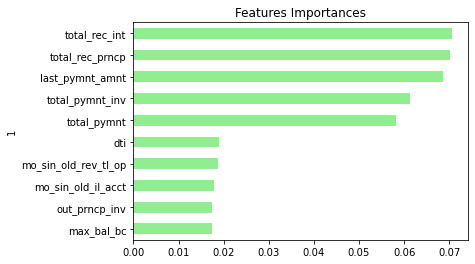

In [40]:
# Visualize the features by importance
sliced_importance.set_index(sliced_importance[1], inplace=True)
sliced_importance.drop(columns=1, inplace=True)
sliced_importance.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = sliced_importance.sort_values(by='Feature Importances')

importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

### Easy Ensemble Classifier

In [44]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\yyamamoto\anaconda3\envs\dev\lib\site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [52]:
# Train the Classifier
from imblearn.ensemble import EasyEnsembleClassifier
eec_model = EasyEnsembleClassifier(random_state=1)
eec_model.fit(X_train_scaled, y_train)
eec_y_pred=EEC_model.predict(X_test_scaled)

In [53]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, eec_y_pred)
# Displaying results
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.735161817969389


In [54]:
# Display the confusion matrix
cm= confusion_matrix(y_test, eec_y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion matrix")
display(cm_df)

Confusion matrix


,Predicted 0,Predicted 1
Actual 0,58,29
Actual 1,3361,13757


In [55]:
# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, eec_y_pred))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.02      0.67      0.80      0.03      0.73      0.53        87
   low_risk       1.00      0.80      0.67      0.89      0.73      0.54     17118

avg / total       0.99      0.80      0.67      0.89      0.73      0.54     17205



### Final Questions

1. Which model had the best balanced accuracy score?

    Easy Ensemble Classifier

2. Which model had the best recall score?

    Balanced Random Forest Classifier

3. Which model had the best geometric mean score?

    Easy Ensemble Classifier

4. What are the top three features?

    1. total_rec_int
    2. total_rec_prncp
    3. last_pymnt_amnt